In [2]:
# Actualizamos los módulos automáticamente
%reload_ext autoreload
%autoreload 2

# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

# Añadir el directorio scripts al PYTHONPATH
sys.path.append(os.path.abspath("../scripts"))

# Importamos funciones personalizadas
import funciones

# Rutas
ruta_user_reviews = '../data/user_reviews.parquet'

# Carga de datos
user_reviews_df = pd.read_parquet(ruta_user_reviews)

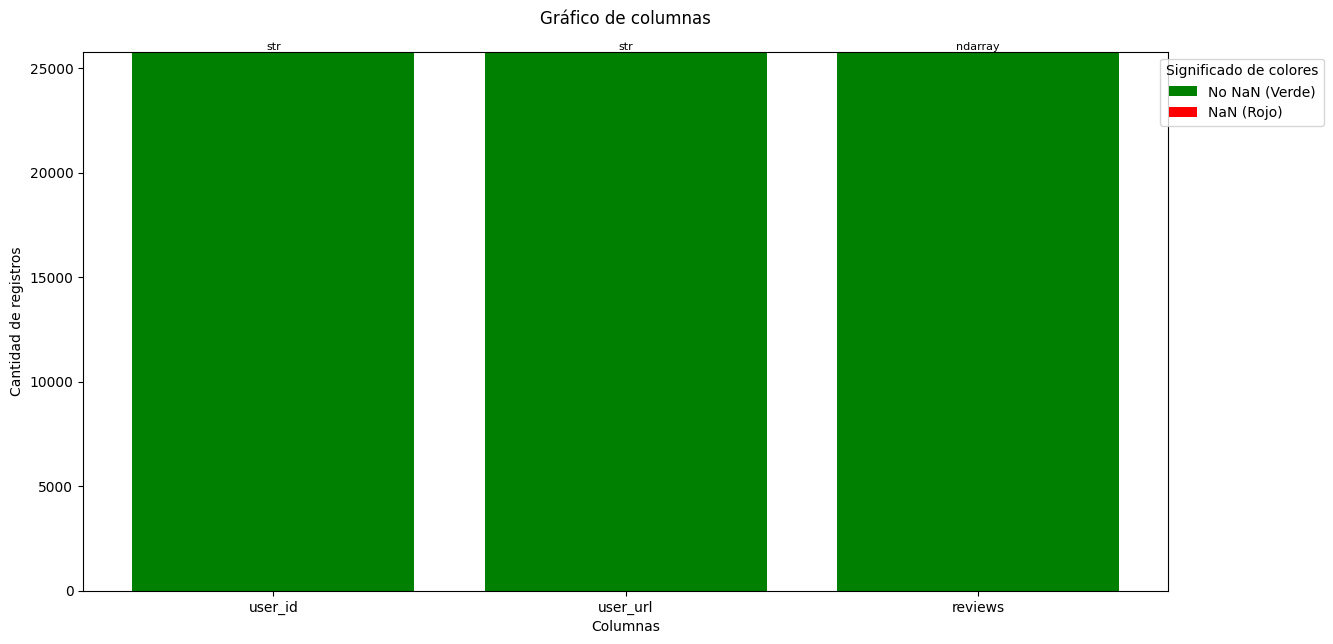

In [3]:
# Visualización inicial
funciones.plot_df_info(user_reviews_df)

In [4]:
# Dimensiones iniciales
user_reviews_df.shape

(25799, 3)

In [5]:
# Pasamos la columna reviews a tipo de dato lista para poder manipularla luego en la desanidación:
user_reviews_df['reviews'] = user_reviews_df['reviews'].apply(lambda x: x.tolist())

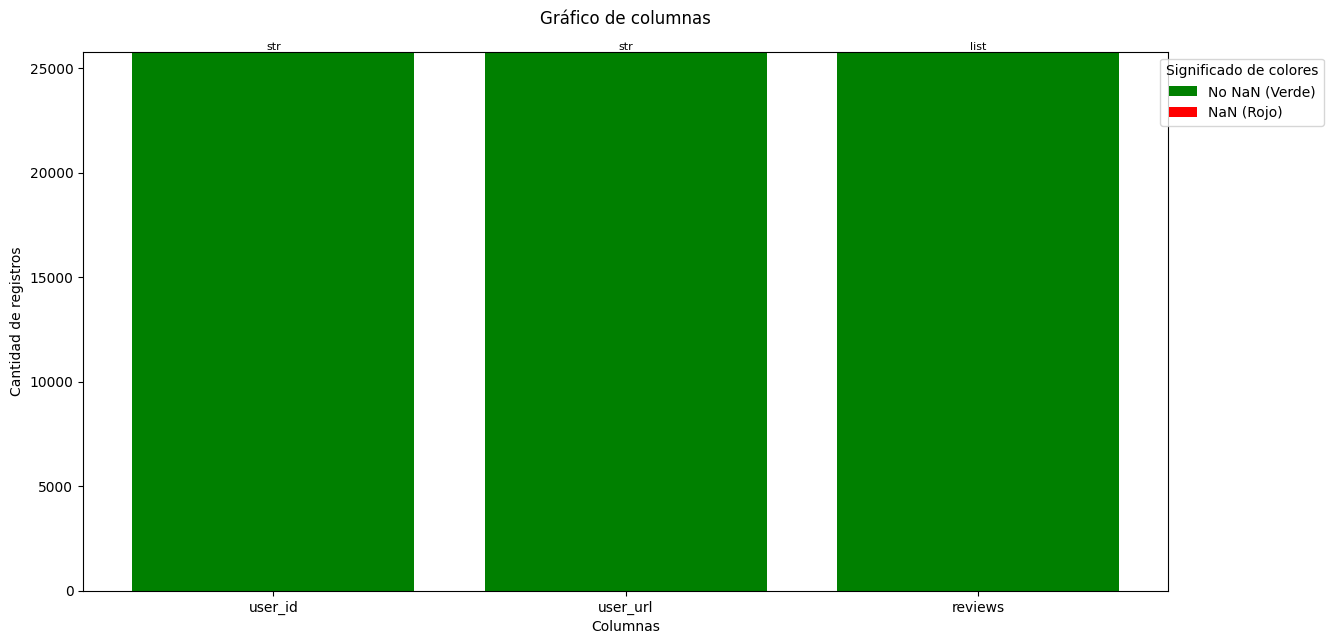

In [6]:
funciones.plot_df_info(user_reviews_df)

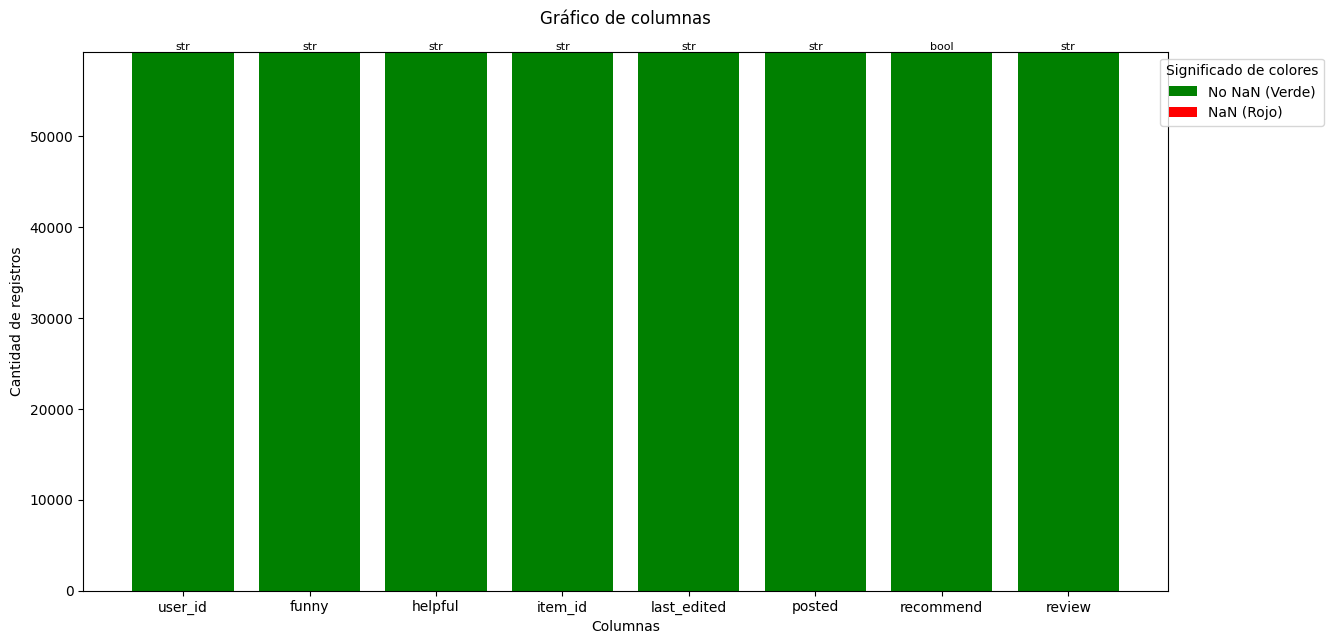

In [7]:
# Explode

# Crear un nuevo DataFrame a partir de los registros expandidos
user_reviews_df = pd.DataFrame(funciones.explode(user_reviews_df, 'reviews'))
'''
Nota: tener en cuenta que la funcion no imputa ningun registro si la lista en reviews esta vacía
'''

funciones.plot_df_info(user_reviews_df)

In [8]:
# Dimensiones post desanidación
user_reviews_df.shape

(59305, 8)

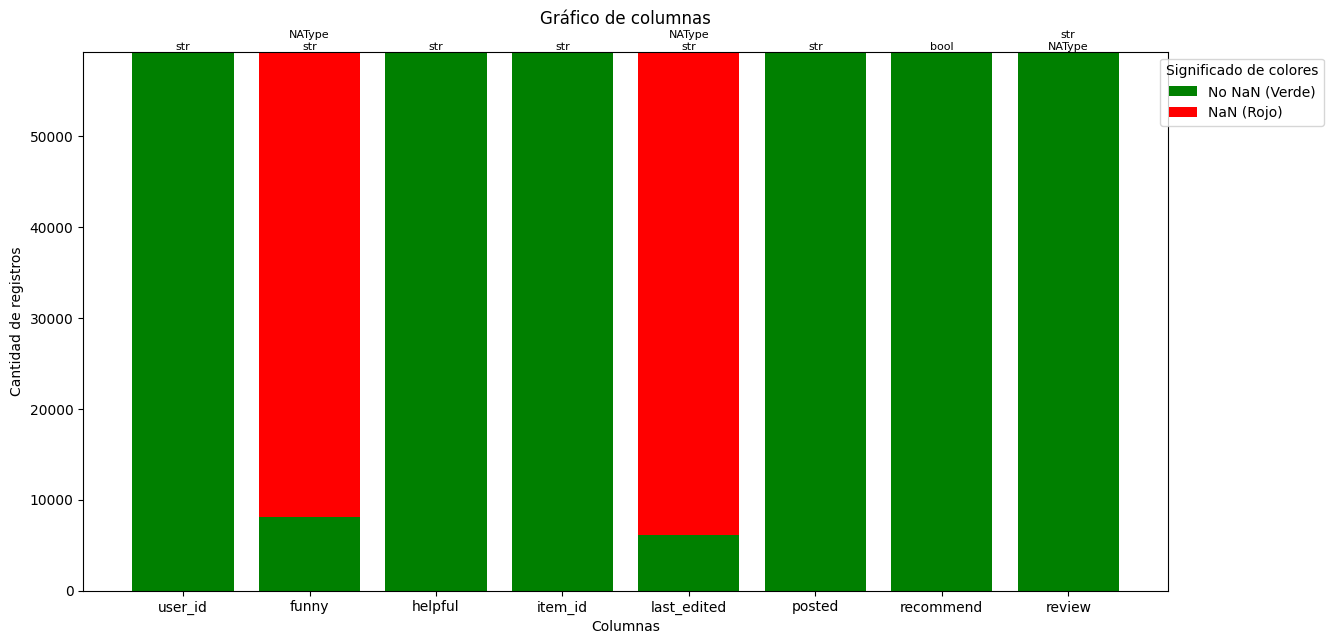

In [9]:
# Pasamos datos vacios a NaN
user_reviews_df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
funciones.plot_df_info(user_reviews_df)

In [10]:
# Filtramos columnas que no vamos a utilizar

In [11]:
user_reviews_df.head(10)

,user_id,funny,helpful,item_id,last_edited,posted,recommend,review
0,76561197970982479,<NA>,No ratings yet,1250,<NA>,"Posted November 5, 2011.",True,Simple yet with great replayability. In my opi...
1,76561197970982479,<NA>,No ratings yet,22200,<NA>,"Posted July 15, 2011.",True,It's unique and worth a playthrough.
2,76561197970982479,<NA>,No ratings yet,43110,<NA>,"Posted April 21, 2011.",True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,<NA>,15 of 20 people (75%) found this review helpful,251610,<NA>,"Posted June 24, 2014.",True,I know what you think when you see this title ...
4,js41637,<NA>,0 of 1 people (0%) found this review helpful,227300,<NA>,"Posted September 8, 2013.",True,For a simple (it's actually not all that simpl...
5,js41637,<NA>,1 of 4 people (25%) found this review helpful,239030,<NA>,"Posted November 29, 2013.",True,Very fun little game to play when your bored o...
6,evcentric,<NA>,No ratings yet,248820,<NA>,Posted February 3.,True,A suitably punishing roguelike platformer. Wi...
7,evcentric,<NA>,No ratings yet,370360,"Last edited December 5, 2015.","Posted December 4, 2015.",True,"""Run for fun? What the hell kind of fun is that?"""
8,evcentric,<NA>,No ratings yet,237930,<NA>,"Posted November 3, 2014.",True,"Elegant integration of gameplay, story, world ..."
9,evcentric,<NA>,No ratings yet,263360,<NA>,"Posted October 15, 2014.",True,"Random drops and random quests, with stat poin..."


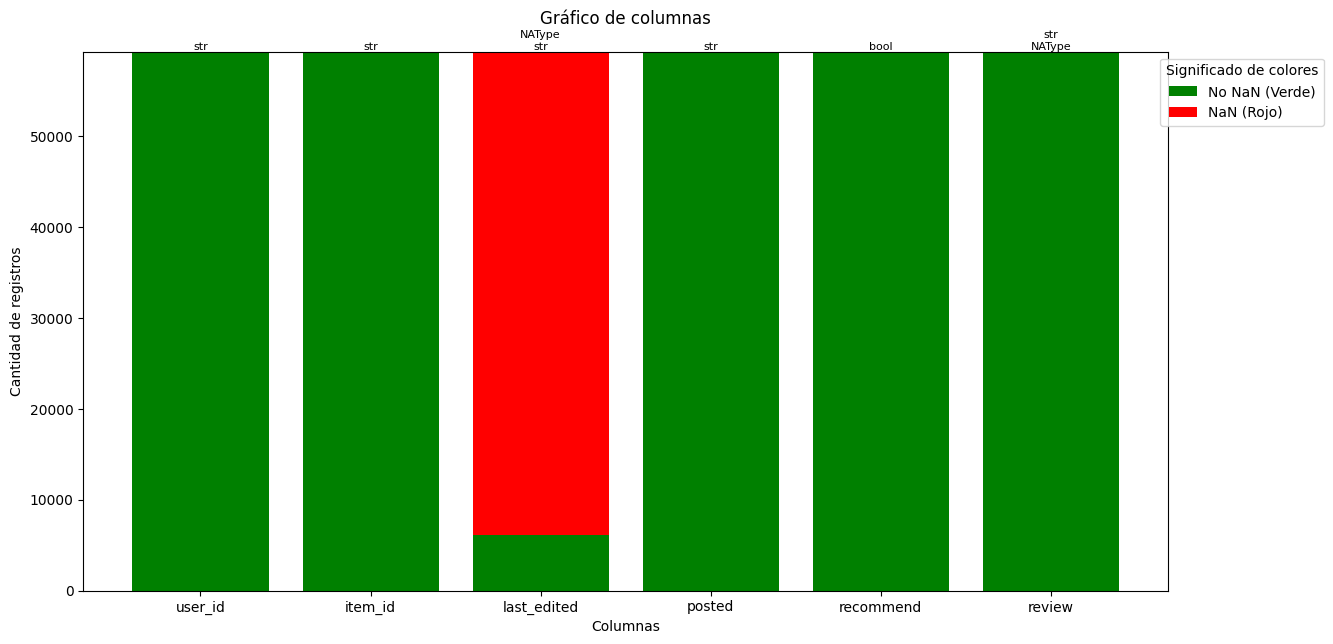

In [12]:
# Eliminamos columnas que no vamos a utilizar, funny y helpful
user_reviews_df.drop(columns=['funny'], inplace=True)
user_reviews_df.drop(columns=['helpful'], inplace=True)
funciones.plot_df_info(user_reviews_df)